In [1]:
import os
os.chdir('..')
os.add_dll_directory("C:/Program Files/NVIDIA GPU Computing Toolkit/CUDA/v11.2/bin")

<AddedDllDirectory('C:/Program Files/NVIDIA GPU Computing Toolkit/CUDA/v11.2/bin')>

In [83]:
from src.data.Dataset import Dataset as DS
import tensorflow as tf
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [7]:
import json

In [2]:
%load_ext autoreload
%autoreload 2

In [27]:
def myFun(arg1, arg2, arg3='direct'):
    print("arg1:", arg1)
    print("arg2:", arg2)
    print("arg3:", arg3)
    
def myFun2(arg1, arg2, arg3, arg4='direct', **kwargs):
    print("arg1:", arg1)
    print("arg2:", arg2)
    print("arg3:", arg3)
    print("arg4:", arg4)

In [28]:
args = ("Geeks", "for", "Geeks")
# myFun(*args)
 
kwargs = {"arg1" : "Geeks", "arg2" : "for", "arg3" : "Geeks", 'arg4':'check'}
myFun2(**kwargs)

arg1: Geeks
arg2: for
arg3: Geeks
arg4: check


In [50]:
path = 'src\models\parameters_2.json'

def load_parameters(path):
    with open(path, 'r') as j:
        contents = json.loads(j.read())
    return contents

In [86]:
contents = load_parameters(path)

print(contents)


{'epochs': 100, 'units': [128, 128], 'metrics': ['mse', 'mape', 'mae'], 'loss': 'mse', 'optimizer': 'adam', 'roll_period': 30, 'patience': 5, 'input_dim': 300, 'pred_dim': 0.25, 'shift': 0.25, 'skip': 0.25, 'hop': 0.25, 'batch_size': 16, 'classification': False, 'in_cols': ['roll', 'pitch', 'heave', 'wave'], 'train_s': 0.1, 'val_s': 0.1, 'out_cols': ['roll']}


In [87]:
Data = DS(**contents)

C:\Users\nimee\OneDrive\Documents\DDP\Parametric_Roll_Detection\src\data\Dataset.py:106: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stats           = stats.append({'Sim_no': i, 'Hs':Hs, 'Tp':Tp, 'Max_roll':max_roll}, ignore_index=True)
C:\Users\nimee\OneDrive\Documents\DDP\Parametric_Roll_Detection\src\data\Dataset.py:106: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stats           = stats.append({'Sim_no': i, 'Hs':Hs, 'Tp':Tp, 'Max_roll':max_roll}, ignore_index=True)
C:\Users\nimee\OneDrive\Documents\DDP\Parametric_Roll_Detection\src\data\Dataset.py:106: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stats           = stats.append({'Sim_no': i, 'Hs':Hs, 'Tp':Tp, 'Max_roll':max_roll}, ignore_index=True)
C:\Users\nimee\O

C:\Users\nimee\OneDrive\Documents\DDP\Parametric_Roll_Detection\src\data\Dataset.py:106: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stats           = stats.append({'Sim_no': i, 'Hs':Hs, 'Tp':Tp, 'Max_roll':max_roll}, ignore_index=True)
C:\Users\nimee\OneDrive\Documents\DDP\Parametric_Roll_Detection\src\data\Dataset.py:106: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stats           = stats.append({'Sim_no': i, 'Hs':Hs, 'Tp':Tp, 'Max_roll':max_roll}, ignore_index=True)
C:\Users\nimee\OneDrive\Documents\DDP\Parametric_Roll_Detection\src\data\Dataset.py:106: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stats           = stats.append({'Sim_no': i, 'Hs':Hs, 'Tp':Tp, 'Max_roll':max_roll}, ignore_index=True)
C:\Users\nimee\O

C:\Users\nimee\OneDrive\Documents\DDP\Parametric_Roll_Detection\src\data\Dataset.py:106: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stats           = stats.append({'Sim_no': i, 'Hs':Hs, 'Tp':Tp, 'Max_roll':max_roll}, ignore_index=True)
C:\Users\nimee\OneDrive\Documents\DDP\Parametric_Roll_Detection\src\data\Dataset.py:106: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stats           = stats.append({'Sim_no': i, 'Hs':Hs, 'Tp':Tp, 'Max_roll':max_roll}, ignore_index=True)
C:\Users\nimee\OneDrive\Documents\DDP\Parametric_Roll_Detection\src\data\Dataset.py:106: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stats           = stats.append({'Sim_no': i, 'Hs':Hs, 'Tp':Tp, 'Max_roll':max_roll}, ignore_index=True)
C:\Users\nimee\O

In [88]:
INPUT_DIM = Data.xshape
OUTPUT_DIM = Data.yshape

print('Input dim:', INPUT_DIM)
print('Output dim:', OUTPUT_DIM)

Input dim: [1200, 4]
Output dim: [1, 1]


In [89]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=INPUT_DIM),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='linear'),
    tf.keras.layers.Dense(OUTPUT_DIM[0])
])

In [73]:
from datetime import datetime
from pathlib import Path
from src.data.Dataset import Dataset as DS
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [90]:
# Defining the required callbacks
model_dir = Path("models")

model_class = 'LSTM'

date_time = datetime.now().strftime("%Y%m%d-%H%M%S")

logs = Path('logs')

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=7,
                                                    mode='min')

checkpoint_filepath = model_dir / model_class / date_time
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=5, min_lr=0.000001)

logdir = logs / model_class / date_time

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir, update_freq=500)

In [76]:
logdir

WindowsPath('logs/LSTM/20220527-153514')

In [ ]:
'''
Call backs needed:

Model_checkpoint_callback
tensorboard callback
reduce_lr callback

'''

'''
Model details:

Model definition
Model class
Model number

'''

In [91]:
def compile_model(optimizer, loss, metrics, **kwargs):
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    
def model_fit(epochs, callbacks, **kwargs):
    model.fit(Data.Train, 
              epochs=kwargs['epochs'], 
              validation_data=Data.Val, 
              callbacks=[model_checkpoint_callback, tensorboard_callback],
             )
    

def Train_func(model, Data, **para):

    compile_model(**para)

    model.fit(Data.Train, 
              epochs=para['epochs'], 
              validation_data=Data.Val, 
              callbacks=[model_checkpoint_callback, tensorboard_callback],
             )

In [92]:
Train_func(model, Data, **contents)

Epoch 1/100
  13251/Unknown - 288s 22ms/step - loss: 0.0038 - mse: 0.0038 - mape: 210.1939 - mae: 0.0220INFO:tensorflow:Assets written to: models\LSTM\20220527-155512\assets
13251/13251 [==============================] - 551s 42ms/step - loss: 0.0038 - mse: 0.0038 - mape: 210.1939 - mae: 0.0220 - val_loss: 7.7044e-04 - val_mse: 7.7044e-04 - val_mape: 150.2146 - val_mae: 0.0145
Epoch 2/100
13251/13251 [==============================] - 548s 41ms/step - loss: 0.0018 - mse: 0.0018 - mape: 218.7516 - mae: 0.0206 - val_loss: 4.0649e-04 - val_mse: 4.0649e-04 - val_mape: 132.3303 - val_mae: 0.0105
Epoch 3/100
13251/13251 [==============================] - 554s 42ms/step - loss: 0.0012 - mse: 0.0012 - mape: 170.1394 - mae: 0.0174 - val_loss: 4.6055e-04 - val_mse: 4.6055e-04 - val_mape: 145.9367 - val_mae: 0.0111
Epoch 4/100
 1451/13251 [==>...........................] - ETA: 4:15 - loss: 0.0046 - mse: 0.0046 - mape: 505.3084 - mae: 0.0532

KeyboardInterrupt: 

In [93]:
%load_ext tensorboard

In [109]:
%tensorboard --logdir {logs/11}

In [2]:
cd ..

c:\Users\nimee\OneDrive\Documents\DDP\Parametric_Roll_Detection


In [3]:
from src.data.Dataset import Dataset as DS
import tensorflow as tf
import numpy as np
import pandas as pd

In [6]:
import matplotlib.pyplot as plt

In [4]:
# Dataset generator
input_dim   = 30*4
pred_dim    = 30*2
shift       = pred_dim
data        = DS(input_dim, pred_dim, shift, skip=1, hop=1.2, normalizer=1)

In [5]:
_, heave, roll, _ = data.get_sim_data(50)

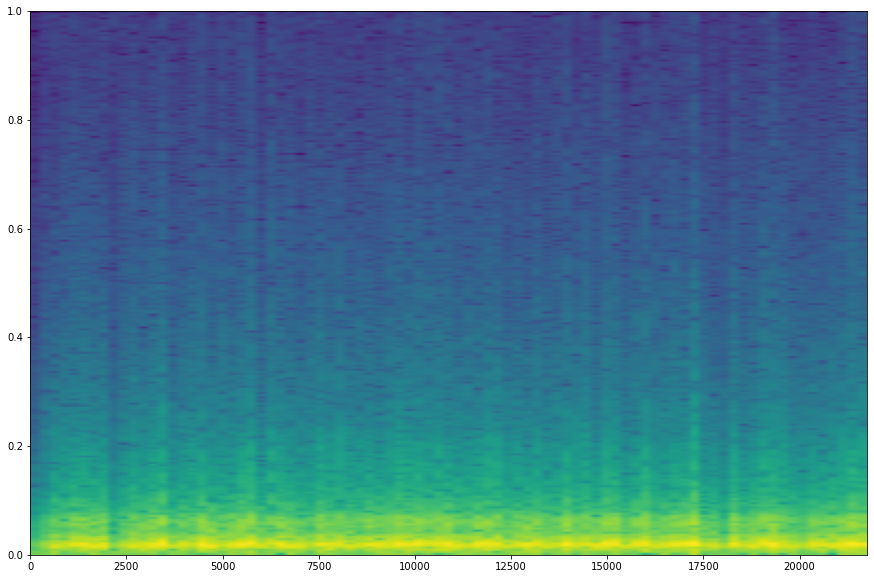

In [7]:
plt.figure(figsize=(15,10))
plt.specgram(roll, Fs=2, NFFT=512, noverlap=0)

plt.show()

In [5]:
train_ds = data.Train
val_gen = data.Val
test_gen = data.Test
example = data.Example(30)

In [6]:
for sample in example:
    print(sample[0].shape)
    print(sample[1].shape)
    break

(1, 120, 1)
(1, 60, 1)


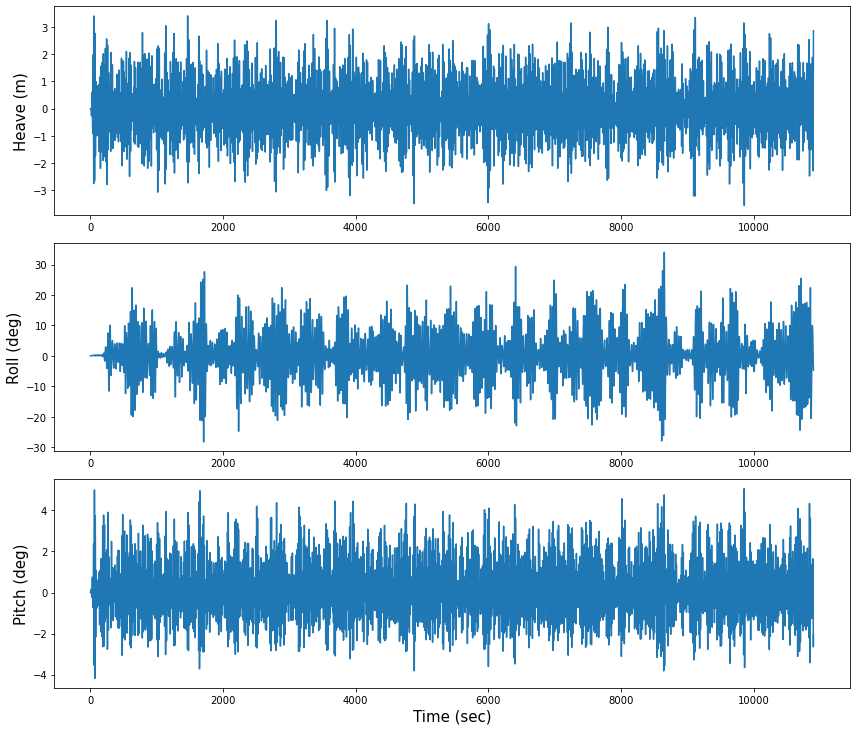

In [7]:
data.plot_sim(50)

In [35]:
classification_model = tf.keras.models.load_model('models/classification_model')

In [63]:
classification_model2 = tf.keras.models.load_model('models/classification_model2')

In [65]:
data2       = DS(input_dim, pred_dim, 2*shift, skip=1, hop=0.1, normalizer=1)

In [60]:
for sample in data2.Train.take(1):
    print(sample[0].shape)
    print(sample[1])
    

(1, 120, 1)
tf.Tensor([[[0.]]], shape=(1, 1, 1), dtype=float64)


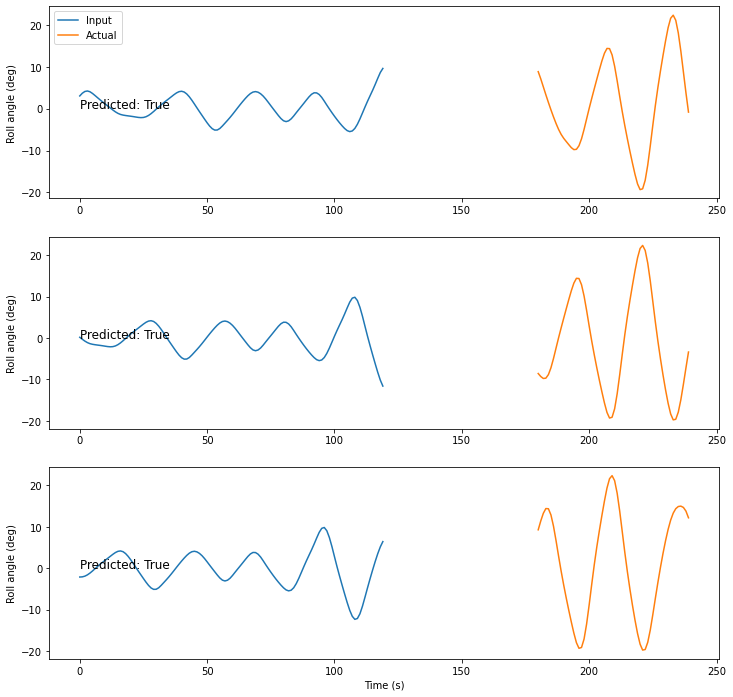

In [66]:
data2.plot_example(50, model=classification_model2, classification=True)

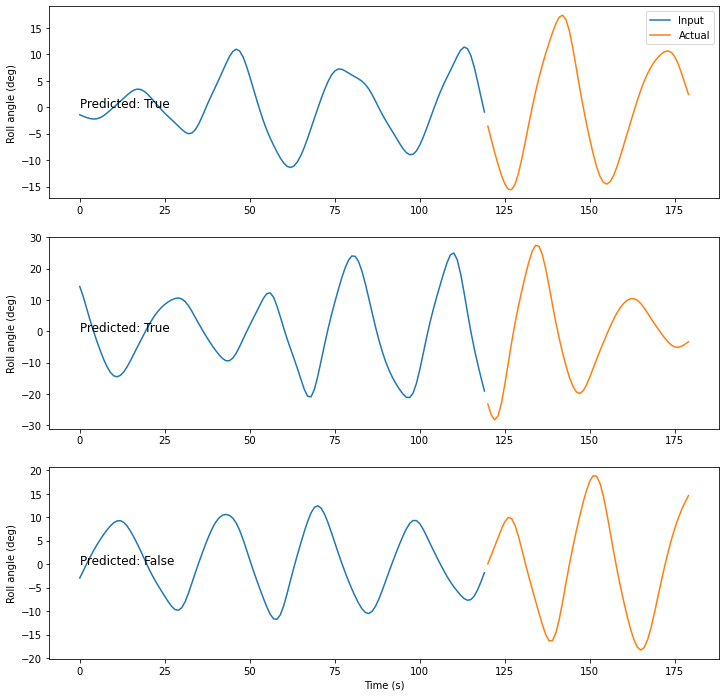

In [48]:
data.plot_example(50, model=classification_model, classification=True, max_plots=3)

In [23]:
oneshot_dnn = tf.keras.models.load_model('models/oneshot_dnn_model')

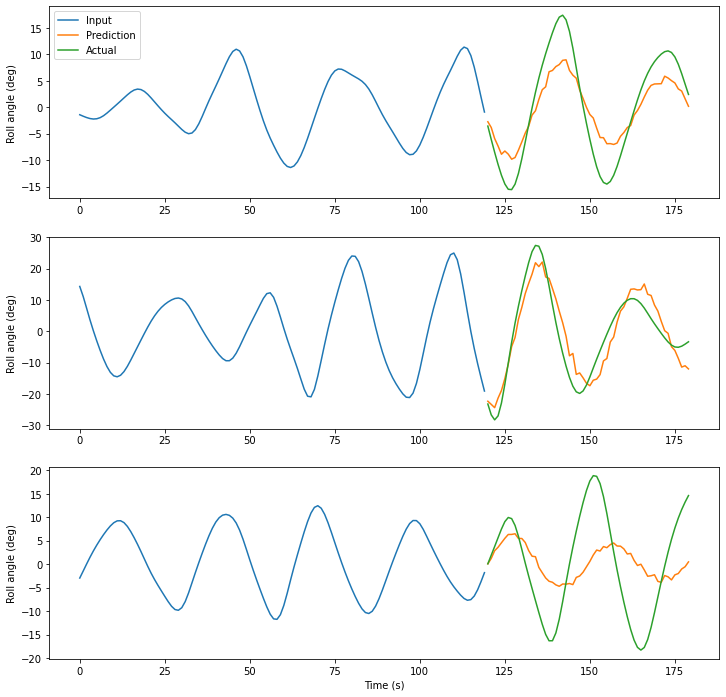

In [30]:
data.plot_example(50, model=oneshot_dnn, max_plots=3)

In [26]:
oneshot_rnn = tf.keras.models.load_model('models/oneshot_rnn_model')

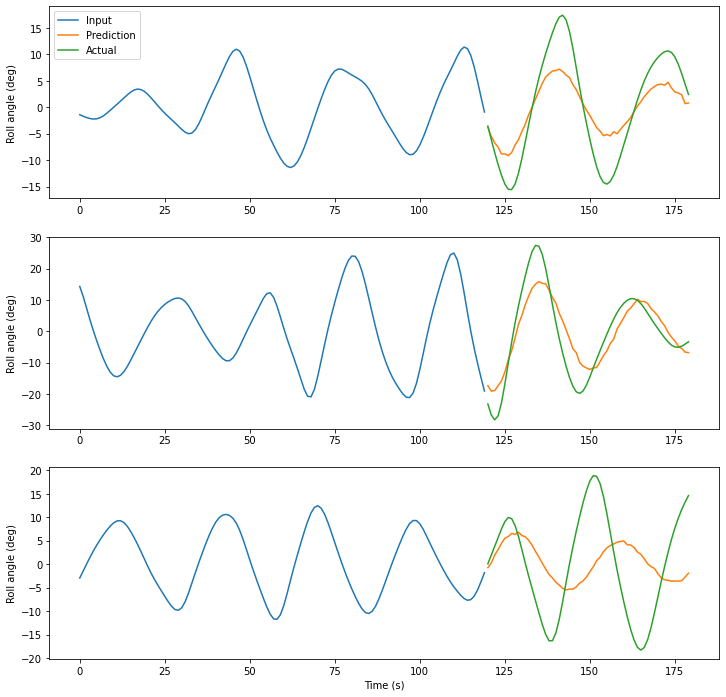

In [31]:
data.plot_example(50, model=oneshot_rnn, max_plots=3)

In [46]:
tf.keras.utils.plot_model(oneshot_rnn, to_file='plots/oneshot_rnn_model.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [6]:
# Loss functions
# Classification loss
Bin_cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

#Regression loss
MSE = tf.keras.losses.MeanSquaredError()
MAE = tf.keras.losses.MeanAbsoluteError()
Mean_Abs_Perc_error = tf.keras.losses.MeanAbsolutePercentageError()

In [ ]:
# Metrics
# Classification metrics
Bin_accuracy = tf.keras.metrics.BinaryAccuracy()

# Regression metrics
MSE_metric = tf.keras.metrics.MeanSquaredError()
MAE_metric = tf.keras.metrics.MeanAbsoluteError()
Mean_Abs_Perc_error_metric = tf.keras.metrics.MeanAbsolutePercentageError()


In [ ]:
# optimizers
Adam = tf.keras.optimizers.Adam(learning_rate=0.001)
SGD = tf.keras.optimizers.SGD(learning_rate=0.001)


In [5]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    # tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=10),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    # tf.keras.layers.Reshape([1, -1]),
])
multi_step_dense.build(input_shape=(None, input_dim))

In [6]:
multi_step_dense.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                3872      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 5,258
Trainable params: 5,258
Non-trainable params: 0
_________________________________________________________________


In [7]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
      lambda epoch: 1e-5 * 10**(epoch / 4))

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsolutePercentageError()])

  history = model.fit(window.Train, epochs=MAX_EPOCHS,
                      validation_data=window.Val,
                      callbacks=[lr_scheduler])
  return history

In [8]:
history = compile_and_fit(multi_step_dense, data)

Epoch 1/20
2751/2751 [==============================] - 11s 4ms/step - loss: 17.4008 - mean_absolute_percentage_error: 505.6106 - val_loss: 8.2700 - val_mean_absolute_percentage_error: 378.1074 - lr: 1.0000e-05
Epoch 2/20
2751/2751 [==============================] - 10s 4ms/step - loss: 11.6014 - mean_absolute_percentage_error: 721.6339 - val_loss: 4.8518 - val_mean_absolute_percentage_error: 396.3552 - lr: 1.7783e-05
Epoch 3/20
2751/2751 [==============================] - 10s 4ms/step - loss: 6.9604 - mean_absolute_percentage_error: 922.4583 - val_loss: 2.6086 - val_mean_absolute_percentage_error: 356.5149 - lr: 3.1623e-05
Epoch 4/20
2751/2751 [==============================] - 10s 4ms/step - loss: 3.9555 - mean_absolute_percentage_error: 960.7920 - val_loss: 1.4705 - val_mean_absolute_percentage_error: 201.8214 - lr: 5.6234e-054.2054 - mean_absolute_percentage_
Epoch 5/20
2751/2751 [==============================] - 11s 4ms/step - loss: 2.5866 - mean_absolute_percentage_error: 698.59

In [9]:
import matplotlib.pyplot as plt

(1e-08, 0.001, 0.0, 60.0)

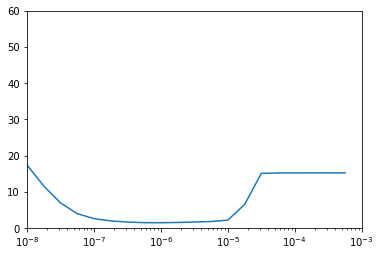

In [10]:
lrs = 1e-8 * (10 ** (np.arange(MAX_EPOCHS) / 4))
plt.semilogx(lrs, history.history['loss'])
plt.axis([1e-8, 1e-3, 0, 60])

In [21]:
val_performance = multi_step_dense.evaluate(data.Val)
performance = multi_step_dense.evaluate(data.Test, verbose=0)

338/338 [==============================] - 1s 3ms/step - loss: 0.0108 - mean_absolute_percentage_error: 58.7347


In [22]:
val_performance

[0.010750397108495235, 58.73473358154297]

In [23]:
performance

[0.020210737362504005, 17.7976131439209]

In [34]:
data.stats_table().to_excel('plots\sim_stats.xlsx')

In [52]:
stats = data._data_stats_()
stats[stats['Sim_no'] == 50]

,Sim_no,Hs,Tp,Max_roll
49,50,8.5,16.19,34.014626


In [16]:
from pathlib import Path
import os
import codecs


path = Path('data') / 'raw' / 'Simulations_01' / 'sim_1' / 'KCS.inp'
# path = '\\'.join(['data' , 'raw' , 'Simulations_01' , 'sim_1' , 'KCS.inp'])
# path = codecs.decode(path, 'unicode_escape')
# os.path.exists(path)
with open(path, 'r') as f:
    lines = f.readlines()
    print(lines[0])

*start_read



In [13]:
cd ..

c:\Users\nimee\OneDrive\Documents\DDP\Parametric_Roll_Detection
